In [1]:
import glob
import cv2
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 첫 YOLOv7 Inference
infer_txt_list = glob.glob('./runs/detect/exp8/labels/*.txt')

In [3]:
infer_txt_list

['./runs/detect/exp8/labels/121500514.txt',
 './runs/detect/exp8/labels/170557564.txt',
 './runs/detect/exp8/labels/154820189.txt',
 './runs/detect/exp8/labels/112544888.txt',
 './runs/detect/exp8/labels/134109434.txt',
 './runs/detect/exp8/labels/112917741.txt',
 './runs/detect/exp8/labels/083926585.txt',
 './runs/detect/exp8/labels/102123882.txt',
 './runs/detect/exp8/labels/135115683.txt',
 './runs/detect/exp8/labels/075525438.txt',
 './runs/detect/exp8/labels/153735014.txt',
 './runs/detect/exp8/labels/104857713.txt',
 './runs/detect/exp8/labels/104934065.txt',
 './runs/detect/exp8/labels/142251447.txt',
 './runs/detect/exp8/labels/170236530.txt',
 './runs/detect/exp8/labels/171036562.txt',
 './runs/detect/exp8/labels/100226255.txt',
 './runs/detect/exp8/labels/163244408.txt',
 './runs/detect/exp8/labels/120507892.txt',
 './runs/detect/exp8/labels/102454243.txt',
 './runs/detect/exp8/labels/134213691.txt',
 './runs/detect/exp8/labels/124654590.txt',
 './runs/detect/exp8/labels/1559

In [4]:
def yolo_labelMe(line, img_width, img_height, txt_file_name):
    line = line.split(' ')
    file_name = txt_file_name.split('/')[-1].split('.')[0] + '.png'
    class_id = line[0]
    x_center = float(line[1])
    y_center = float(line[2])
    width = float(line[3])
    height = float(line[4])
    confidence = round(float(line[5]),3) # 변경
    
    point1_x = x_center - (width / 2) # box의 왼쪽 위 꼭지점
    point1_y = y_center + (height / 2) # box의 왼쪽 위 꼭지점
    point2_x = x_center + (width / 2) # box의 오른쪽 위 꼭지점
    point2_y = y_center + (height / 2) # box의 오른쪽 위 꼭지점
    point3_x = x_center + (width / 2) # box의 오른쪽 아래 꼭지점
    point3_y = y_center - (height / 2) # box의 오른쪽 아래 꼭지점
    point4_x = x_center - (width / 2) # box의 왼쪽 아래 꼭지점
    point4_y = y_center - (height / 2) # box의 왼쪽 아래 꼭지점
    
    # 변경
    point1_x = point1_x * img_width
    point1_y = point1_y * img_height
    point2_x = point2_x * img_width
    point2_y = point2_y * img_height
    point3_x = point3_x * img_width
    point3_y = point3_y * img_height
    point4_x = point4_x * img_width
    point4_y = point4_y * img_height

    return file_name, class_id, confidence, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y, point4_x, point4_y

In [5]:
submit = pd.DataFrame(columns=['file_name', 'class_id', 'confidence', 'point1_x', 'point1_y', 'point2_x', 'point2_y', 'point3_x', 'point3_y', 'point4_x', 'point4_y'])

for txt in tqdm(infer_txt_list):
    with open(txt, 'r') as f:
        lines = f.readlines()
        base_file_name = txt.split('/')[-1].split('.')[0]
        img_height, img_width = cv2.imread('./custom/images/test/' + base_file_name + '.png').shape[:2]
        for line in lines:
            file_name, class_id, confidence, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y, point4_x, point4_y = yolo_labelMe(line, img_width, img_height, txt)
            if confidence < 0.2:
                break
            submit = submit.append({'file_name':file_name, 'class_id':class_id, 'point1_x':point1_x, 'point1_y':point1_y, 'point2_x':point2_x, 'point2_y':point2_y, 'point3_x':point3_x, 'point3_y':point3_y, 'point4_x':point4_x, 'point4_y':point4_y, 'confidence':confidence}, ignore_index=True)

submit.to_csv('./submission/yolov7_submit9.csv', index=False)

100%|███████████████████████████████████████| 3398/3398 [01:33<00:00, 36.29it/s]


### sample plot

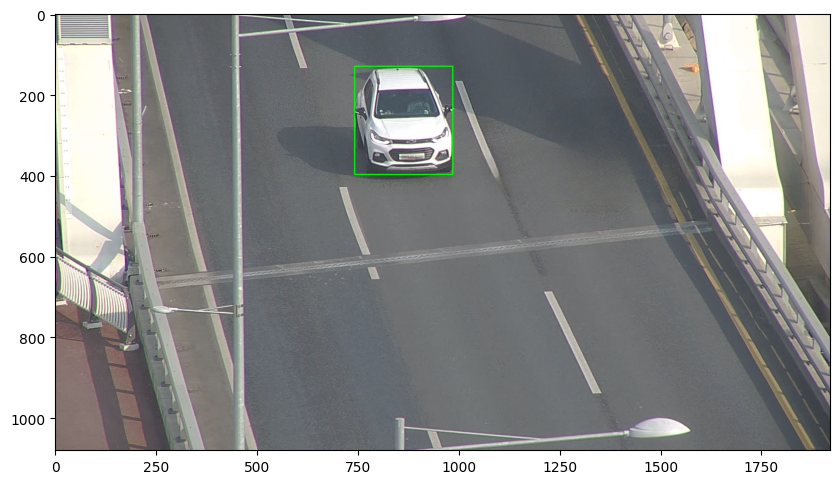

In [6]:
import matplotlib.pyplot as plt

sample_txt = infer_txt_list[10]
sample_base_file_name = sample_txt.split('/')[-1].split('.')[0]
sample_img = cv2.imread('./custom/images/test/' + sample_base_file_name + '.png')
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

with open(sample_txt, 'r') as f:
    lines = f.readlines()
    img_height, img_width = cv2.imread('./custom/images/test/' + sample_base_file_name + '.png').shape[:2]
    for line in lines:
        file_name, class_id, confidence, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y, point4_x, point4_y = yolo_labelMe(line, img_width, img_height, txt)
        cv2.rectangle(sample_img, (int(point1_x), int(point1_y)), (int(point3_x), int(point3_y)), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(sample_img)
plt.show()

In [15]:
pd.read_csv('sample_submission.csv')

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y


In [6]:
pd.read_csv('./submission/yolov7_submit6.csv')

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,121500514.png,11,0.995,788.00064,430.99938,1064.00064,430.99938,1064.00064,98.99982,788.00064,98.99982
1,170557564.png,22,0.990,928.99872,867.00024,1231.99968,867.00024,1231.99968,537.99984,928.99872,537.99984
2,170557564.png,5,0.991,760.00032,461.00016,1015.99968,461.00016,1015.99968,221.00040,760.00032,221.00040
3,154820189.png,21,0.991,1078.00032,334.99980,1343.00064,334.99980,1343.00064,34.99956,1078.00032,34.99956
4,112544888.png,11,0.985,1226.00064,630.00072,1528.00128,630.00072,1528.00128,274.00032,1226.00064,274.00032
...,...,...,...,...,...,...,...,...,...,...,...
4807,152117425.png,22,0.396,859.99968,642.00060,1096.00032,642.00060,1096.00032,394.00020,859.99968,394.00020
4808,152117425.png,27,0.937,762.00000,1080.00054,1047.99936,1080.00054,1047.99936,741.00042,762.00000,741.00042
4809,152117425.png,22,0.975,762.00000,1080.00054,1050.00000,1080.00054,1050.00000,737.00010,762.00000,737.00010
4810,152117425.png,23,0.976,859.99968,641.00052,1096.00032,641.00052,1096.00032,394.00020,859.99968,394.00020


In [7]:
pd.read_csv('./submission/yolov7_submit7.csv')

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,121500514.png,11,0.995,788.00064,430.99938,1064.00064,430.99938,1064.00064,98.99982,788.00064,98.99982
1,170557564.png,22,0.990,928.99872,867.00024,1231.99968,867.00024,1231.99968,537.99984,928.99872,537.99984
2,170557564.png,5,0.991,760.00032,461.00016,1015.99968,461.00016,1015.99968,221.00040,760.00032,221.00040
3,154820189.png,22,0.133,956.99904,1080.00000,1335.99936,1080.00000,1335.99936,625.00032,956.99904,625.00032
4,154820189.png,21,0.991,1078.00032,334.99980,1343.00064,334.99980,1343.00064,34.99956,1078.00032,34.99956
...,...,...,...,...,...,...,...,...,...,...,...
5225,152117425.png,27,0.937,762.00000,1080.00054,1047.99936,1080.00054,1047.99936,741.00042,762.00000,741.00042
5226,152117425.png,22,0.975,762.00000,1080.00054,1050.00000,1080.00054,1050.00000,737.00010,762.00000,737.00010
5227,152117425.png,23,0.976,859.99968,641.00052,1096.00032,641.00052,1096.00032,394.00020,859.99968,394.00020
5228,152415267.png,30,0.162,799.99968,389.99988,1024.00032,389.99988,1024.00032,153.00036,799.99968,153.00036


In [7]:
pd.read_csv('./submission/yolov7_submit8.csv')

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,121500514.png,11,0.976,787.99968,430.99938,1062.99936,430.99938,1062.99936,96.99966,787.99968,96.99966
1,170557564.png,5,0.975,760.00032,462.00024,1015.99968,462.00024,1015.99968,222.00048,760.00032,222.00048
2,170557564.png,22,0.977,928.99872,868.00032,1231.99968,868.00032,1231.99968,538.99992,928.99872,538.99992
3,154820189.png,21,0.972,1077.99936,334.99980,1341.99936,334.99980,1341.99936,35.99964,1077.99936,35.99964
4,112544888.png,21,0.165,1226.00064,631.99926,1528.00128,631.99926,1528.00128,272.99970,1226.00064,272.99970
...,...,...,...,...,...,...,...,...,...,...,...
5397,153751732.png,29,0.977,1120.00032,315.00036,1359.00000,315.00036,1359.00000,75.00060,1120.00032,75.00060
5398,152117425.png,22,0.475,859.99968,644.00022,1096.00032,644.00022,1096.00032,393.00066,859.99968,393.00066
5399,152117425.png,23,0.910,859.00032,644.00022,1096.00128,644.00022,1096.00128,393.00066,859.00032,393.00066
5400,152117425.png,27,0.948,763.00032,1080.00054,1048.99968,1080.00054,1048.99968,740.00034,763.00032,740.00034


In [7]:
pd.read_csv('./submission/yolov7_submit9.csv')

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,121500514.png,16,0.362,786.00000,429.99930,1059.00096,429.99930,1059.00096,96.99966,786.00000,96.99966
1,121500514.png,11,0.414,787.00032,430.99938,1058.00064,430.99938,1058.00064,96.99966,787.00032,96.99966
2,154820189.png,22,0.357,978.99936,1080.00000,1306.99872,1080.00000,1306.99872,699.99984,978.99936,699.99984
3,154820189.png,22,0.374,975.00000,1080.00054,1305.00000,1080.00054,1305.00000,929.00034,975.00000,929.00034
4,154820189.png,27,0.462,974.00064,1080.00000,1310.00064,1080.00000,1310.00064,704.00016,974.00064,704.00016
...,...,...,...,...,...,...,...,...,...,...,...
3191,131825401.png,10,0.561,1127.99904,374.99976,1397.99904,374.99976,1397.99904,137.00016,1127.99904,137.00016
3192,121901776.png,14,0.544,614.99904,403.99992,861.99936,403.99992,861.99936,164.00016,614.99904,164.00016
3193,075810691.png,13,0.480,1078.00032,351.00054,1336.00032,351.00054,1336.00032,115.00002,1078.00032,115.00002
3194,143303651.png,7,0.543,690.00096,279.00018,951.00000,279.00018,951.00000,0.00054,690.00096,0.00054
